In [4]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
comp_fail = pd.read_csv("train_data.csv",index_col=0)

In [5]:
print(comp_fail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, jobID1634295 to jobID1165709
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   memory_GB            20000 non-null  float64
 1   network_log10_MBps   20000 non-null  float64
 2   local_IO_log10_MBps  20000 non-null  float64
 3   NFS_IO_log10_MBps    20000 non-null  float64
 4   failed               20000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 937.5+ KB
None


In [ ]:
#Looking unique values
print(comp_fail.nunique())
#Looking the data
print(df_credit.head())

In [16]:
comp_fail.failed.unique()

array([0, 1], dtype=int64)

In [26]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = ["Working"],
            y = comp_fail[comp_fail["failed"]== 0]["failed"].value_counts().values,
            name='Working'
    )

trace1 = go.Bar(
            x = ["Failed"],
            y = comp_fail[comp_fail["failed"]== 1]["failed"].value_counts().values,
            name='Failed'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Failure Variable'
    ),
    title='Failure Distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [57]:
#Percentage of Failure
non_fail_count =int(comp_fail[comp_fail["failed"]== 0]["failed"].value_counts())
fail_count = int(comp_fail[comp_fail["failed"]== 1]["failed"].value_counts())
print((fail_count/(non_fail_count+fail_count)*100),"%")
print((non_fail_count/(non_fail_count+fail_count)*100),"%")

8.129999999999999 %
91.86999999999999 %


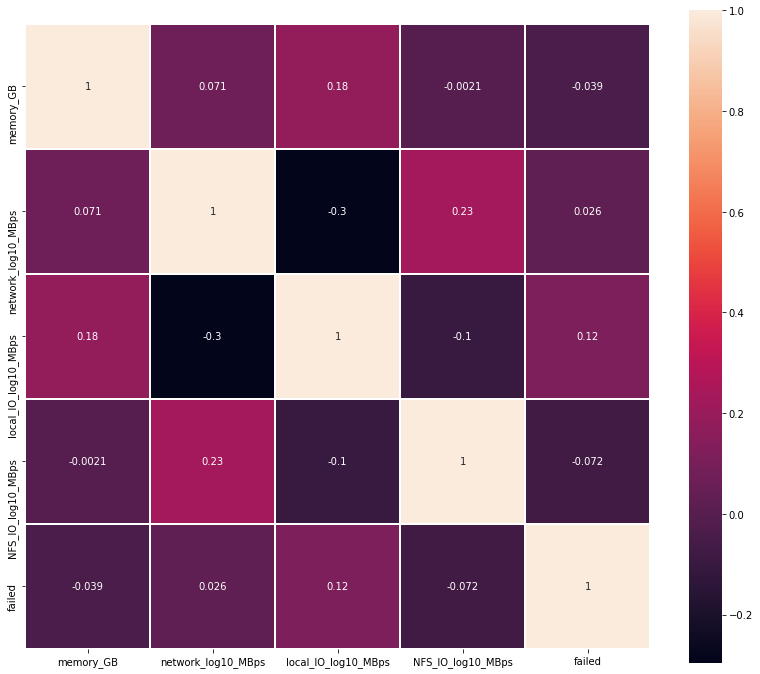

In [58]:
plt.figure(figsize=(14,12))
sns.heatmap(comp_fail.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [61]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [64]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

LR: 0.000000 (0.000000)
LDA: 0.000000 (0.000000)
KNN: 0.426437 (0.041268)
CART: 0.456394 (0.048213)
NB: 0.000000 (0.000000)
RF: 0.376478 (0.041858)
SVM: 0.309780 (0.036041)
C:\Users\nil\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[23:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\nil\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146:

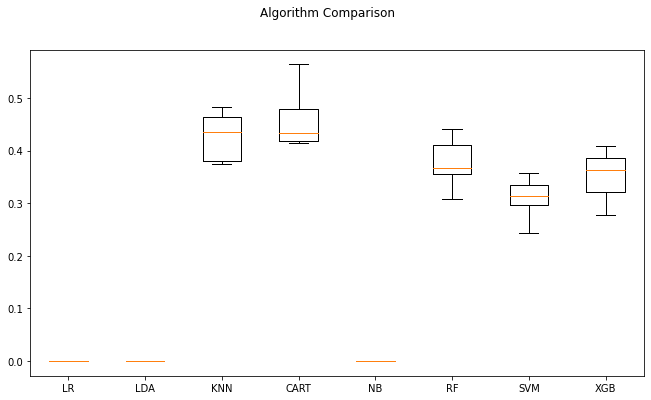

In [65]:
seed = 666

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()